# 04. Self Oil Station Price Analysis

## 1. 셀레니움 설치
- conda install selenium
- chromedriver

In [ ]:
conda install -y selenium

In [1]:
!pip list grep sele

Package           Version
----------------- ------------
backcall          0.2.0
Bottleneck        1.3.2
branca            0.4.2
brotlipy          0.7.0
certifi           2021.10.8
cffi              1.15.0
colorama          0.4.4
cryptography      36.0.0
cycler            0.11.0
decorator         5.1.1
et-xmlfile        1.1.0
fake-useragent    0.1.11
folium            0.12.1.post1
fonttools         4.25.0
idna              3.3
ipython           7.31.1
jedi              0.18.1
joblib            1.1.0
kiwisolver        1.3.2
matplotlib        3.5.1
matplotlib-inline 0.1.2
mkl-fft           1.3.1
mkl-random        1.2.2
mkl-service       2.4.0
munkres           1.1.4
numexpr           2.8.1
numpy             1.21.5
olefile           0.46
openpyxl          3.0.9
packaging         21.3
pandas            1.4.1
parso             0.8.3
pickleshare       0.7.5
Pillow            8.4.0
pip               21.2.4
prompt-toolkit    3.0.20
pycparser         2.21
Pygments          2.11.2
pyOpenSSL     

In [2]:
from selenium import webdriver

C:\Users\nihso\miniconda3\envs\ds_study\lib\site-packages\selenium\webdriver\firefox\firefox_profile.py:208: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if setting is None or setting is '':


## 2. 셀프 주유소가 정말 저렴하나요? - 데이터 확보하기 위한 작업
- https://www.opinet.co.kr/searRgSelect.do 
- 사이트 구조 확인
- 목표 데이터
    - 브랜드
    - 가격
    - 셀프 주유 여부
    - 위치

In [3]:
# URL 접근
URL = "https://www.opinet.co.kr/searRgSelect.do"
driver = webdriver.Chrome("../driver/chromedriver.exe")
driver.get(URL)

In [25]:
driver.get(URL)

- 문제
    - 1. 해당 URL로 한 번에 접근이 안됩니다.
    - 2. 메인페이지로 접속이 되고, 팝업창이 하나 나옵니다

# 팝업창 화면 전환 후 닫아주기
# 접근 페이지 다시 요청

In [4]:
# 팝업창 화면 전환 후 닫아주기
driver.switch_to_window(driver.window_handles[-1])

WebDriverException: Message: chrome not reachable
  (Session info: chrome=98.0.4758.102)


In [ ]:
driver.close()

In [10]:
driver.get(URL)

In [ ]:
import time

def main_get():
    #페이지 접근
    URL = "https://www.opinet.co.kr/searRgSelect.do"
    driver = webdriver.Chrome("../driver/chromedriver.exe")
    driver.get(URL)
    time.sleep(3)
    # 팝업창 전환
    driver.switch_to_window(driver.window_handles[-1])
    # 팝업창 닫아주기
    driver.close()
    time.sleep(3)
    # 메인화면 창으로 전환
    driver.switch_to_window(driver.window_handles[-1])
    # 접근 URL 다시 요청
    driver.get(URL)

In [12]:
def main_get1(): # 팝업이 안뜨니 실제로 실행할 함수
    URL = "https://www.opinet.co.kr/searRgSelect.do"
    driver = webdriver.Chrome("../driver/chromedriver.exe")
    driver.get(URL)
    time.sleep(3)

    # 접근 URL 다시 요청
    driver.get(URL)

In [22]:
main_get1()

In [26]:
# 지역: 시/도

sido_list_raw = driver.find_element_by_id("SIDO_NM0")
sido_list_raw.text


'            시/도\n            \n             \n              서울\n             \n             \n            \n             \n             \n              부산\n             \n            \n             \n             \n              대구\n             \n            \n             \n             \n              인천\n             \n            \n             \n             \n              광주\n             \n            \n             \n             \n              대전\n             \n            \n             \n             \n              울산\n             \n            \n             \n             \n              세종\n             \n            \n             \n             \n              경기\n             \n            \n             \n             \n              강원\n             \n            \n             \n             \n              충북\n             \n            \n             \n             \n              충남\n             \n            \n             \n             \n              

In [31]:
len(sido_list_raw.find_elements_by_tag_name("option"))

18

In [32]:
sido_list = sido_list_raw.find_elements_by_tag_name("option")
len(sido_list), sido_list[17].text

(18, '제주')

In [33]:
sido_list[1].get_attribute("value")

'서울특별시'

In [34]:
sido_names = []

for option in sido_list:
    sido_names.append(option.get_attribute("value"))
sido_names

['',
 '서울특별시',
 '부산광역시',
 '대구광역시',
 '인천광역시',
 '광주광역시',
 '대전광역시',
 '울산광역시',
 '세종특별자치시',
 '경기도',
 '강원도',
 '충청북도',
 '충청남도',
 '전라북도',
 '전라남도',
 '경상북도',
 '경상남도',
 '제주특별자치도']

In [35]:
# 2. 
sido_names = [option.get_attribute("value") for option in sido_list]
sido_names

['',
 '서울특별시',
 '부산광역시',
 '대구광역시',
 '인천광역시',
 '광주광역시',
 '대전광역시',
 '울산광역시',
 '세종특별자치시',
 '경기도',
 '강원도',
 '충청북도',
 '충청남도',
 '전라북도',
 '전라남도',
 '경상북도',
 '경상남도',
 '제주특별자치도']

In [50]:
sido_list_raw.send_keys(sido_names[1])

In [64]:
# 구

gu_list_raw = driver.find_element_by_id("SIGUNGU_NM0") # 부모 태그
gu_list = gu_list_raw.find_elements_by_tag_name("option") #자식 태그

gu_names = [option.get_attribute("value") for option in gu_list]
len(gu_names)

26

In [57]:
gu_names

['',
 '강남구',
 '강동구',
 '강북구',
 '강서구',
 '관악구',
 '광진구',
 '구로구',
 '금천구',
 '노원구',
 '도봉구',
 '동대문구',
 '동작구',
 '마포구',
 '서대문구',
 '서초구',
 '성동구',
 '성북구',
 '송파구',
 '양천구',
 '영등포구',
 '용산구',
 '은평구',
 '종로구',
 '중구',
 '중랑구']

In [ ]:
gu_list_raw.send_keys(gu_names[6])

In [65]:
driver.find_element_by_css_selector("#glopopd_excel").click()


In [66]:
driver.find_element_by_xpath('//*[@id="glopopd_excel"]').click()


In [67]:
element_get_excel = driver.find_element_by_id("glopopd_excel")
element_get_excel.click()

In [68]:
import time
from tqdm import tqdm_notebook

for gu in tqdm_notebook(gu_names):
    element = driver.find_element_by_id("SIGUNGU_NM0")
    element.send_keys(gu)
    time.sleep(1)

    element_get_excel = driver.find_element_by_xpath('//*[@id="glopopd_excel"]').click()
    time.sleep(1)
    


C:\Users\nihso\AppData\Local\Temp\ipykernel_21028\633369046.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for gu in tqdm_notebook(gu_names):


  0%|          | 0/26 [00:00<?, ?it/s]

In [69]:
driver.close()

## 4. 데이터 정리하기


In [70]:
import pandas as pd
from glob import glob


In [71]:
# 파일 목록 한 번에 가져오기
glob("../data/지역_*.xls")

['../data\\지역_위치별(주유소) (1).xls',
 '../data\\지역_위치별(주유소) (10).xls',
 '../data\\지역_위치별(주유소) (11).xls',
 '../data\\지역_위치별(주유소) (12).xls',
 '../data\\지역_위치별(주유소) (13).xls',
 '../data\\지역_위치별(주유소) (14).xls',
 '../data\\지역_위치별(주유소) (15).xls',
 '../data\\지역_위치별(주유소) (16).xls',
 '../data\\지역_위치별(주유소) (17).xls',
 '../data\\지역_위치별(주유소) (18).xls',
 '../data\\지역_위치별(주유소) (19).xls',
 '../data\\지역_위치별(주유소) (2).xls',
 '../data\\지역_위치별(주유소) (20).xls',
 '../data\\지역_위치별(주유소) (21).xls',
 '../data\\지역_위치별(주유소) (22).xls',
 '../data\\지역_위치별(주유소) (23).xls',
 '../data\\지역_위치별(주유소) (24).xls',
 '../data\\지역_위치별(주유소) (25).xls',
 '../data\\지역_위치별(주유소) (3).xls',
 '../data\\지역_위치별(주유소) (4).xls',
 '../data\\지역_위치별(주유소) (5).xls',
 '../data\\지역_위치별(주유소) (6).xls',
 '../data\\지역_위치별(주유소) (7).xls',
 '../data\\지역_위치별(주유소) (8).xls',
 '../data\\지역_위치별(주유소) (9).xls',
 '../data\\지역_위치별(주유소).xls']

In [72]:
# 파일명 저장
stations_files = glob("../data/지역_*.xls")
stations_files[:5]

['../data\\지역_위치별(주유소) (1).xls',
 '../data\\지역_위치별(주유소) (10).xls',
 '../data\\지역_위치별(주유소) (11).xls',
 '../data\\지역_위치별(주유소) (12).xls',
 '../data\\지역_위치별(주유소) (13).xls']

In [74]:
# 하나만 읽어보기

tmp = pd.read_excel(stations_files[0], header=2)
tmp.tail()


,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
32,서울특별시,(주)만정에너지,서울 강남구 봉은사로 433 (삼성동),GS칼텍스,02-518-5141,N,2498,2298,2054,1599
33,서울특별시,제이제이주유소,서울 강남구 언주로 716,현대오일뱅크,02-518-5631,N,2565,2375,2235,-
34,서울특별시,삼성주유소,서울 강남구 삼성로 521 (삼성동),SK에너지,02-538-0809,N,-,-,-,-
35,서울특별시,경원주유소,서울 강남구 도산대로 428 (청담동),S-OIL,02-517-1957,N,-,-,-,-
36,서울특별시,동우주유소,서울특별시 강남구 봉은사로 311 (논현동),SK에너지,02-542-6726,N,-,-,-,-


In [75]:
tmp_raw = []

for file_name in stations_files:
    tmp = pd.read_excel(file_name, header=2)
    tmp_raw.append(tmp)

In [76]:
tmp_raw

[       지역                   상호                         주소      상표  \
 0   서울특별시          (주)보성 세곡주유소      서울 강남구  헌릉로 731 (세곡동)   SK에너지   
 1   서울특별시  현대오일뱅크(주)직영 산성셀프주유소             서울 강남구 헌릉로 730  현대오일뱅크   
 2   서울특별시                방죽주유소      서울 강남구 밤고개로 215 (율현동)   GS칼텍스   
 3   서울특별시       현대오일뱅크 도곡셀프주유소  서울 강남구  남부순환로 2718 (도곡2동)  현대오일뱅크   
 4   서울특별시                대교주유소      서울 강남구 강남대로 640 (신사동)   SK에너지   
 5   서울특별시             오일프러스 셀프    서울 강남구 남부순환로 2651 (도곡동)   SK에너지   
 6   서울특별시      현대오일뱅크(주) 유진주유소       서울 강남구 논현로 152 (도곡동)  현대오일뱅크   
 7   서울특별시              SK서광주유소             서울 강남구 역삼로 142   SK에너지   
 8   서울특별시              자곡셀프주유소      서울 강남구 밤고개로 120 (자곡동)   SK에너지   
 9   서울특별시        SK에너지㈜ 진달래주유소             서울 강남구 도곡로 208   SK에너지   
 10  서울특별시  지에스칼텍스㈜에너지플러스허브GS타워       서울 강남구 논현로 516 (역삼동)   GS칼텍스   
 11  서울특별시       SK에너지(주) 매봉주유소             서울 강남구 언주로 307   SK에너지   
 12  서울특별시           (주)선진도곡주유소       서울 강남구 도곡로 162 (도곡동)   S-OIL   
 13  서울특별시          

- 형식이 동일하고 연달아 붙이기만 하면 될 때는 concat # 밑에 추가 추가 추가

In [77]:
stations_raw = pd.concat(tmp_raw)
stations_raw

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,(주)보성 세곡주유소,서울 강남구 헌릉로 731 (세곡동),SK에너지,02-445-6870,Y,-,1763,1574,-
1,서울특별시,현대오일뱅크(주)직영 산성셀프주유소,서울 강남구 헌릉로 730,현대오일뱅크,02-2226-4963,Y,1990,1779,1584,-
2,서울특별시,방죽주유소,서울 강남구 밤고개로 215 (율현동),GS칼텍스,02-459-3434,Y,-,1797,1629,-
3,서울특별시,현대오일뱅크 도곡셀프주유소,서울 강남구 남부순환로 2718 (도곡2동),현대오일뱅크,02-529-5101,Y,1953,1798,1648,-
4,서울특별시,대교주유소,서울 강남구 강남대로 640 (신사동),SK에너지,02-512-5521,N,1970,1810,1650,-
...,...,...,...,...,...,...,...,...,...,...
8,서울특별시,현대오일뱅크㈜직영 새한셀프주유소,서울 강북구 도봉로 75,현대오일뱅크,02-985-4382,Y,2005,1764,1584,-
9,서울특별시,㈜지에스이앤알 미아주유소,서울 강북구 도봉로 122 (미아동),GS칼텍스,02-987-5152,Y,1894,1764,1584,-
10,서울특별시,세원주유소,서울 강북구 한천로 918 (번동),SK에너지,02-907-6890,Y,-,1768,1598,1300
11,서울특별시,대성석유(주)신광주유소,서울 강북구 삼양로 484,GS칼텍스,02-908-3320,N,-,1775,1595,1350


In [79]:
stations_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 484 entries, 0 to 12
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      484 non-null    object
 1   상호      484 non-null    object
 2   주소      484 non-null    object
 3   상표      484 non-null    object
 4   전화번호    484 non-null    object
 5   셀프여부    484 non-null    object
 6   고급휘발유   484 non-null    object
 7   휘발유     484 non-null    object
 8   경유      484 non-null    object
 9   실내등유    484 non-null    object
dtypes: object(10)
memory usage: 41.6+ KB


In [80]:
stations_raw.columns

Index(['지역', '상호', '주소', '상표', '전화번호', '셀프여부', '고급휘발유', '휘발유', '경유', '실내등유'], dtype='object')

In [81]:
stations = pd.DataFrame({
    "상호": stations_raw["상호"],
    "주소": stations_raw["주소"],
    "가격": stations_raw["휘발유"],
    "셀프": stations_raw["셀프여부"],
    "상표": stations_raw["상표"],

})
stations.tail()

,상호,주소,가격,셀프,상표
8,현대오일뱅크㈜직영 새한셀프주유소,서울 강북구 도봉로 75,1764,Y,현대오일뱅크
9,㈜지에스이앤알 미아주유소,서울 강북구 도봉로 122 (미아동),1764,Y,GS칼텍스
10,세원주유소,서울 강북구 한천로 918 (번동),1768,Y,SK에너지
11,대성석유(주)신광주유소,서울 강북구 삼양로 484,1775,N,GS칼텍스
12,에덴주유소,서울 강북구 월계로 195 (번동),1779,Y,SK에너지


In [84]:
for eachAddress in stations["주소"]:
    print(eachAddress.split()[1])

강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
도봉구
도봉구
도봉구
도봉구
도봉구
도봉구
도봉구
도봉구
도봉구
도봉구
도봉구
도봉구
도봉구
도봉구
도봉구
도봉구
도봉구
도봉구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동작구
동작구
동작구
동작구
동작구
동작구
동작구
동작구
동작구
동작구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천

In [85]:
stations["구"] = [eachAddress.split()[1] for eachAddress in stations["주소"]]

In [86]:
stations

,상호,주소,가격,셀프,상표,구
0,(주)보성 세곡주유소,서울 강남구 헌릉로 731 (세곡동),1763,Y,SK에너지,강남구
1,현대오일뱅크(주)직영 산성셀프주유소,서울 강남구 헌릉로 730,1779,Y,현대오일뱅크,강남구
2,방죽주유소,서울 강남구 밤고개로 215 (율현동),1797,Y,GS칼텍스,강남구
3,현대오일뱅크 도곡셀프주유소,서울 강남구 남부순환로 2718 (도곡2동),1798,Y,현대오일뱅크,강남구
4,대교주유소,서울 강남구 강남대로 640 (신사동),1810,N,SK에너지,강남구
...,...,...,...,...,...,...
8,현대오일뱅크㈜직영 새한셀프주유소,서울 강북구 도봉로 75,1764,Y,현대오일뱅크,강북구
9,㈜지에스이앤알 미아주유소,서울 강북구 도봉로 122 (미아동),1764,Y,GS칼텍스,강북구
10,세원주유소,서울 강북구 한천로 918 (번동),1768,Y,SK에너지,강북구
11,대성석유(주)신광주유소,서울 강북구 삼양로 484,1775,N,GS칼텍스,강북구


In [88]:
stations["구"].unique(), len(stations["구"].unique())

(array(['강남구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구',
        '송파구', '양천구', '강동구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구',
        '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구'], dtype=object),
 25)

In [89]:
# 가격 데이터형 변환 object => float

stations["가격"] = stations["가격"].astype(float)

ValueError: could not convert string to float: '-'

In [90]:
# 가격 정보 없는 주유소

stations[stations["가격"] == "-"]

,상호,주소,가격,셀프,상표,구
34,삼성주유소,서울 강남구 삼성로 521 (삼성동),-,N,SK에너지,강남구
35,경원주유소,서울 강남구 도산대로 428 (청담동),-,N,S-OIL,강남구
36,동우주유소,서울특별시 강남구 봉은사로 311 (논현동),-,N,SK에너지,강남구
27,지에스칼텍스㈜ 화일주유소,서울 영등포구 도림로 415,-,Y,GS칼텍스,영등포구
16,삼융주유소,서울 은평구 수색로 299 (수색동),-,N,SK에너지,은평구
10,지에스칼텍스(주)직영 역전점,서울 중구 퇴계로 15,-,N,GS칼텍스,중구
15,구의스타주유소,서울 광진구 자양로 103,-,N,GS칼텍스,광진구


In [91]:
# 가격 정보가 있는 주유소만 사용
stations = stations[stations["가격"] != "-"]
stations.tail()

,상호,주소,가격,셀프,상표,구
8,현대오일뱅크㈜직영 새한셀프주유소,서울 강북구 도봉로 75,1764,Y,현대오일뱅크,강북구
9,㈜지에스이앤알 미아주유소,서울 강북구 도봉로 122 (미아동),1764,Y,GS칼텍스,강북구
10,세원주유소,서울 강북구 한천로 918 (번동),1768,Y,SK에너지,강북구
11,대성석유(주)신광주유소,서울 강북구 삼양로 484,1775,N,GS칼텍스,강북구
12,에덴주유소,서울 강북구 월계로 195 (번동),1779,Y,SK에너지,강북구


In [93]:
stations["가격"] = stations["가격"].astype(float)

C:\Users\nihso\AppData\Local\Temp\ipykernel_21028\1891987101.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stations["가격"] = stations["가격"].astype(float)


In [95]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 477 entries, 0 to 12
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   상호      477 non-null    object 
 1   주소      477 non-null    object 
 2   가격      477 non-null    float64
 3   셀프      477 non-null    object 
 4   상표      477 non-null    object 
 5   구       477 non-null    object 
dtypes: float64(1), object(5)
memory usage: 26.1+ KB


In [96]:
# 인덱스 재정렬
stations.reset_index(inplace=True)
stations.tail()

,index,상호,주소,가격,셀프,상표,구
472,8,현대오일뱅크㈜직영 새한셀프주유소,서울 강북구 도봉로 75,1764.0,Y,현대오일뱅크,강북구
473,9,㈜지에스이앤알 미아주유소,서울 강북구 도봉로 122 (미아동),1764.0,Y,GS칼텍스,강북구
474,10,세원주유소,서울 강북구 한천로 918 (번동),1768.0,Y,SK에너지,강북구
475,11,대성석유(주)신광주유소,서울 강북구 삼양로 484,1775.0,N,GS칼텍스,강북구
476,12,에덴주유소,서울 강북구 월계로 195 (번동),1779.0,Y,SK에너지,강북구


In [97]:
del stations["index"]
stations.head()

,상호,주소,가격,셀프,상표,구
0,(주)보성 세곡주유소,서울 강남구 헌릉로 731 (세곡동),1763.0,Y,SK에너지,강남구
1,현대오일뱅크(주)직영 산성셀프주유소,서울 강남구 헌릉로 730,1779.0,Y,현대오일뱅크,강남구
2,방죽주유소,서울 강남구 밤고개로 215 (율현동),1797.0,Y,GS칼텍스,강남구
3,현대오일뱅크 도곡셀프주유소,서울 강남구 남부순환로 2718 (도곡2동),1798.0,Y,현대오일뱅크,강남구
4,대교주유소,서울 강남구 강남대로 640 (신사동),1810.0,N,SK에너지,강남구


## 5. 주유 가격 정보 시각화

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns 
import platform
from matplotlib import rc

rc("font", family="Malgun Gothic")
%matplotlib inline

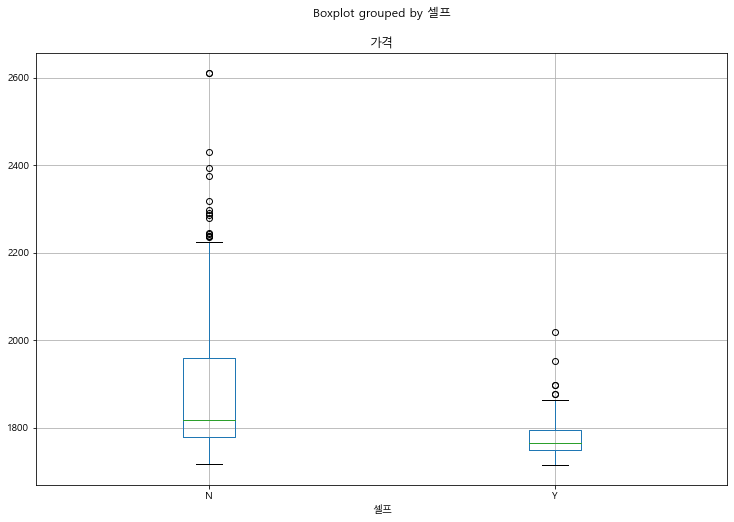

In [99]:
# boxplot(feat. pandas)

stations.boxplot(column="가격", by="셀프", figsize=(12, 8));

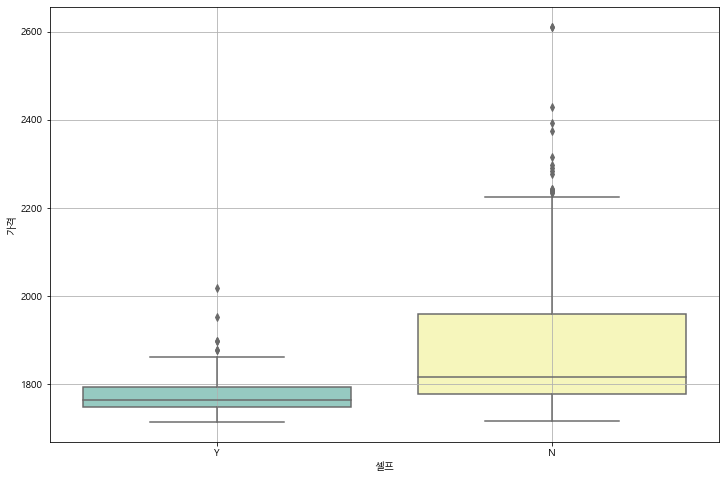

In [101]:
# boxplot(feat. seaborn)

plt.figure(figsize=(12, 8))
sns.boxplot(x="셀프", y="가격", data=stations, palette="Set3")
plt.grid(True)
plt.show()

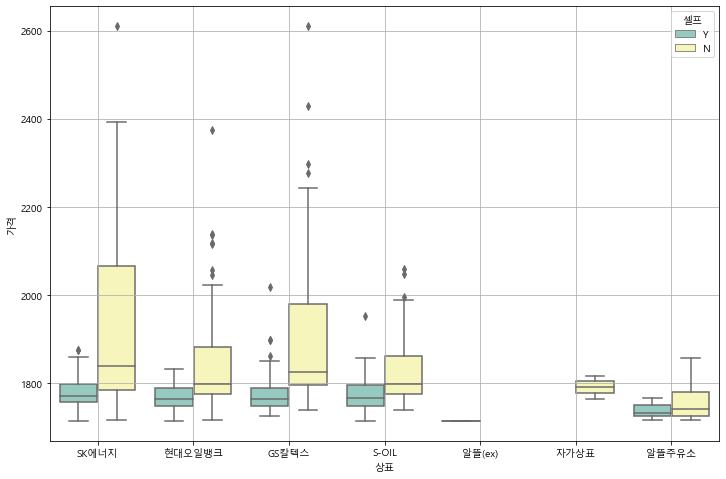

In [103]:
# boxplot (feat. seaborn)

plt.figure(figsize=(12, 8))
sns.boxplot(x="상표", y="가격", hue="셀프", data=stations, palette="Set3")
plt.grid(True)
plt.show()

In [ ]:
# 지도 시각화

In [104]:
import json
import folium
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [105]:
stations.sort_values(by="가격", ascending=False).head(10)

,상호,주소,가격,셀프,상표,구
327,서남주유소,서울 중구 통일로 30,2611.0,N,SK에너지,중구
292,서계주유소,서울특별시 용산구 청파로 367 (청파동),2610.0,N,GS칼텍스,용산구
326,필동주유소,서울 중구 퇴계로 196 (필동2가),2429.0,N,GS칼텍스,중구
325,SK에너지(주) 퇴계로주유소,서울 중구 퇴계로 228 (필동2가),2394.0,N,SK에너지,중구
33,제이제이주유소,서울 강남구 언주로 716,2375.0,N,현대오일뱅크,강남구
140,선우상사Q엔느,서울 서초구 방배로 66 (방배동),2317.0,N,SK에너지,서초구
32,(주)만정에너지,서울 강남구 봉은사로 433 (삼성동),2298.0,N,GS칼텍스,강남구
291,동자동주유소,서울 용산구 한강대로104길 6 (동자동),2290.0,N,SK에너지,용산구
31,SK논현주유소,서울 강남구 논현로 747 (논현동),2285.0,N,SK에너지,강남구
436,구로주유소,서울 구로구 구로동로 137 (구로동),2278.0,N,GS칼텍스,구로구


In [106]:
stations.sort_values(by="가격", ascending=True).head(10)

,상호,주소,가격,셀프,상표,구
215,(주)타이거오일 신정주유소,서울 양천구 중앙로 226 (신정동),1714.0,Y,SK에너지,양천구
108,만남의광장주유소,서울 서초구 양재대로12길 73-71,1714.0,Y,알뜰(ex),서초구
214,현대주유소,서울 양천구 남부순환로 372 (신월동),1714.0,Y,S-OIL,양천구
35,(주)자연에너지 햇살주유소,서울 도봉구 방학로 142 (방학동),1715.0,Y,현대오일뱅크,도봉구
34,(주)헨지스에너지 구도일주유소 도봉,서울 도봉구 도봉로 706 (방학동),1715.0,Y,S-OIL,도봉구
36,도봉제일주유소(주)송만에너지,서울 도봉구 도봉로 783 (도봉동),1717.0,N,현대오일뱅크,도봉구
355,화곡역주유소,서울 강서구 강서로 154 (화곡동),1718.0,Y,알뜰주유소,강서구
216,가로공원주유소,서울 양천구 가로공원로 165 (신월동),1718.0,N,SK에너지,양천구
93,구도일주유소 두꺼비,서울 서대문구 성산로 312,1718.0,Y,S-OIL,서대문구
356,뉴신정주유소,서울 강서구 곰달래로 207 (화곡동),1718.0,N,알뜰주유소,강서구


In [107]:
import numpy as np

gu_data = pd.pivot_table(data=stations, index="구", values="가격", aggfunc=np.mean)

In [108]:
gu_data

,가격
구,
강남구,1962.411765
강동구,1835.928571
강북구,1756.076923
강서구,1789.718750
관악구,1813.928571
광진구,1789.200000
구로구,1805.380952
금천구,1768.666667
노원구,1794.933333


In [116]:
geo_path = "../data/02. skorea_municipalities_geo_simple.json"
geo_str = json.load(open(geo_path, encoding="utf-8"))

my_map = folium.Map(location=[37.5502, 126.982], zoom_start=10.5, tiles="OpenStreetMap")
my_map.choropleth(
    geo_data=geo_str,
    data=gu_data,
    columns=[gu_data.index, "가격"],
    key_on="feature.id",
    fill_color="PuRd"

)

my_map